In [930]:
# Import required libraries

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score,mean_squared_error

In [931]:
import warnings
warnings.filterwarnings('ignore')

##### Reading and Understanding Dataset

In [4596]:
#read dataset
bike_df=pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4421]:
# checking the shape of dataframe 
bike_df.shape

(730, 16)

In [4422]:
# checking the variables in dataframe
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4423]:
#Checking dataset in detail
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No Null value present in dataset. 

In [4424]:
#checking numeriacl variable details
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Data Quality Check

   - Duplicate Check

In [3212]:
#check for duplicates
bike_df.duplicated().sum()

0

      Count is 0 means no duplicate value found in Dataset.

  - Null Value Check column wise

In [3213]:

(bike_df.isnull().sum()/len(bike_df.index))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [3202]:
bike_df.isnull().sum(axis=1)/16

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64

In [ ]:
No Null values present in dataset. we are good to go.

##### Identify unessential Variables from dataset


Identify and drop the variables which are not very useful in analysis

- instant-this is a index column having unique value in each row

- dteday -having seprate column like year,month,weekday.

- casual & registered - Sum of both are stored in cnt variable. these variable cause data leakage in moding so we betterto    remove these 2 variables.

- Before removal of dteday we can extract new columns from it  

##### Feature Engineering

From above mention columns we can extract Week number for dteday columns. 

In [3203]:
bike_df_1=bike_df
bike_df_1.shape


(730, 16)

In [3204]:
bike_df_1.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [3205]:
bike_df_1['dteday'] = pd.to_datetime(bike_df_1['dteday'])

In [3206]:

bike_df_1['week']=bike_df_1['dteday'].dt.week
print(bike_df_1.shape)
print(bike_df.shape)

(730, 17)
(730, 17)


In [1249]:
bike_df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,week
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,5


#####  Remove unessential columns

In [2307]:
#checking shape before deleation
bike_df.shape

(730, 16)

In [4597]:
#dropping variables which are not usefulin analysis
bike_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [4506]:
#checking shape after deletion
bike_df.shape

(730, 12)

Out of 16 we dropped 4 variables which is not very useful in analysis.

##### Categorical variable indentification 

Next step is to Identify the categorical variables and map them with correct labels available in Data dictonary

Looking into data and data dictonary below are the categorical variables

- season (season (1:spring, 2:summer, 3:fall, 4:winter))
- yr (0: 2018, 1:2019)
- mnth(0-12)
- weekday(1-6)
- workingday(0 and 1)
- weathersit (1: Clear, 2: Mist, 3: LightSnow, 4: HeavyRain)
- holiday(0 and 1)
- holiday,yr and working values are in binary (0 and 1) so need to encoding

In [951]:
bike_df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [952]:
bike_df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [953]:
bike_df['holiday'].unique()

array([0, 1], dtype=int64)

In [954]:
bike_df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [955]:
bike_df['workingday'].unique()

array([0, 1], dtype=int64)

In [956]:
bike_df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

We confirmed that these are the categorical  variables.

##### Categorical variables mapping

mapping categorial variables with correct labels available in Data dictonary

In [3739]:
# identify categorical variables
list_cat = ['season','yr','mnth','holiday','weekday', 'workingday','weathersit']


In [4598]:
bike_df['season']=bike_df['season'].astype('category')
bike_df['weathersit']=bike_df['weathersit'].astype('category')
bike_df['mnth']=bike_df['mnth'].astype('category')
bike_df['weekday']=bike_df['weekday'].astype('category')


In [4599]:
bike_df['season'] = bike_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [4600]:
bike_df['weekday'] = bike_df['weekday'].map({0: 'Tue', 1: 'Wed', 2: 'Thr', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon'})
bike_df['weekday'].value_counts()

Mon    105
Wed    105
Tue    105
Sun    104
Sat    104
Thr    104
Fri    103
Name: weekday, dtype: int64

In [4601]:
bike_df['mnth'] = bike_df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_df['mnth'].value_counts()


Dec     62
Oct     62
Aug     62
July    62
May     62
Mar     62
Jan     62
Nov     60
Sep     60
June    60
Apr     60
Feb     56
Name: mnth, dtype: int64

In [4602]:
bike_df['weathersit'] = bike_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'LightSnow', 4: 'HeavyRain'})
bike_df['weathersit'].value_counts()

Clear        463
Mist         246
LightSnow     21
Name: weathersit, dtype: int64

In [4603]:
#check after mapping
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thr,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [4604]:
bike_df['yr']=bike_df['yr'].astype('category')
bike_df['holiday']=bike_df['holiday'].astype('category')
bike_df['workingday']=bike_df['workingday'].astype('category')

In [4605]:
#checking datatype for mapped variables
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.0 KB


##### Data Visualisation

- Univarient Analysis

In [4606]:

def univar_analysis(col):
 plt.figure(figsize=(20,4),facecolor='gray')
 plt.subplot(1, 3, 1)
 plt.plot(col,data=bike_df)
 plt.subplot(1, 3, 2)
 sns.boxplot(col,data =bike_df)
 plt.subplot(1, 3, 3)
 sns.histplot(data =bike_df,x=col)
 plt.show()

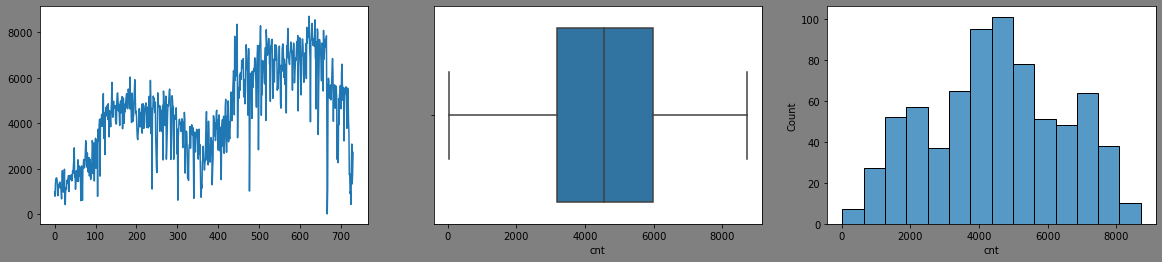

In [4607]:
univar_analysis('cnt')

Initially the demand has an increase and we can see a decrease in demand afterward.

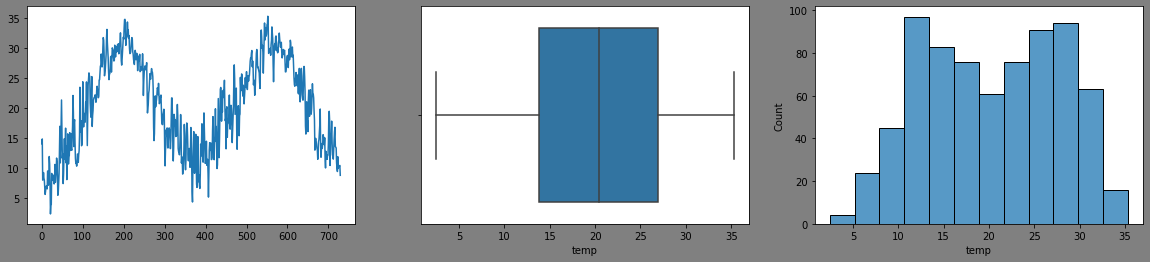

In [4608]:
univar_analysis('temp')

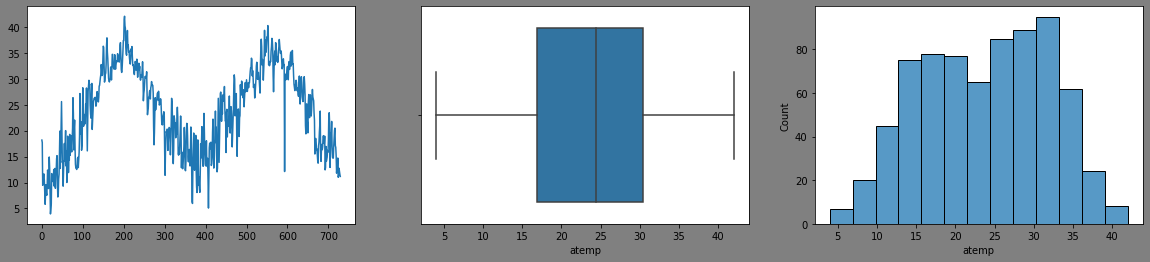

In [4609]:
univar_analysis('atemp')

No outliers found in variable temp.we can see similar pattern for temp and atemp.

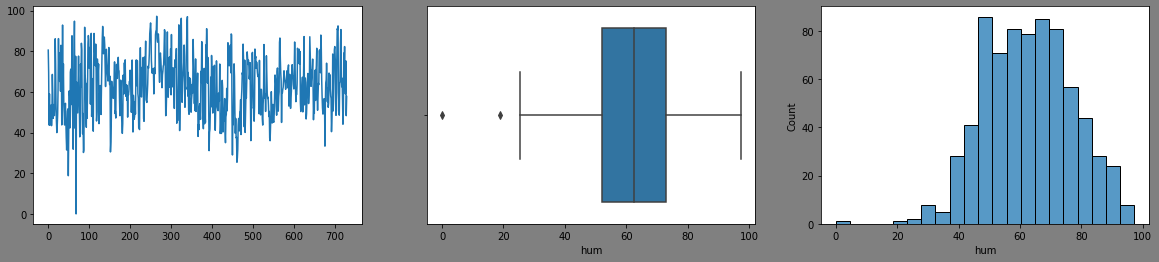

In [4610]:
univar_analysis('hum')

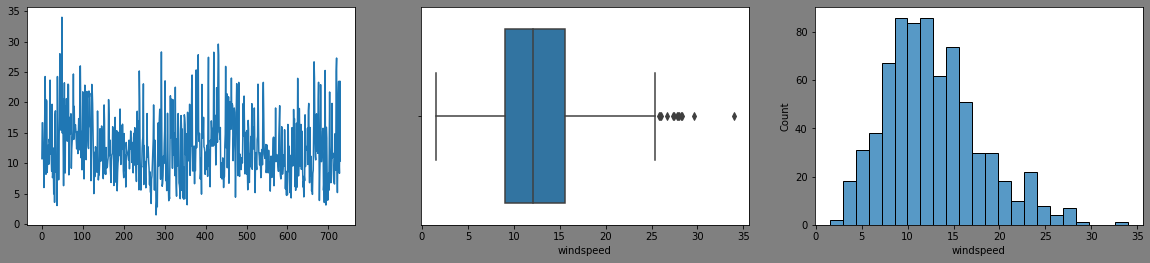

In [4611]:
univar_analysis('windspeed')

In [ ]:
Few outliers we can see in windspeed and hum. those are not abnormal lets confirm percentage of ouliers.

In [4612]:
def outliers_calculation (df):
    per25 = df.quantile(0.25)
    per75 = df.quantile(0.75)
    iqr =   per75-per25
    up_lmt =  per75+iqr*1.5
    lwr_lmt = per25-iqr*1.5
    
    Res = round(((df<lwr_lmt).sum()+(df>up_lmt).sum())/len(df)*100,2)
 
    return(Res)

print('Humidity outlier',outliers_calculation(bike_df['hum']))
print('windspeed',outliers_calculation(bike_df['windspeed']))

Humidity outlier 0.27
windspeed 1.78


Outlier percentage for both the variables are not so high. no need to do outlier treatement.

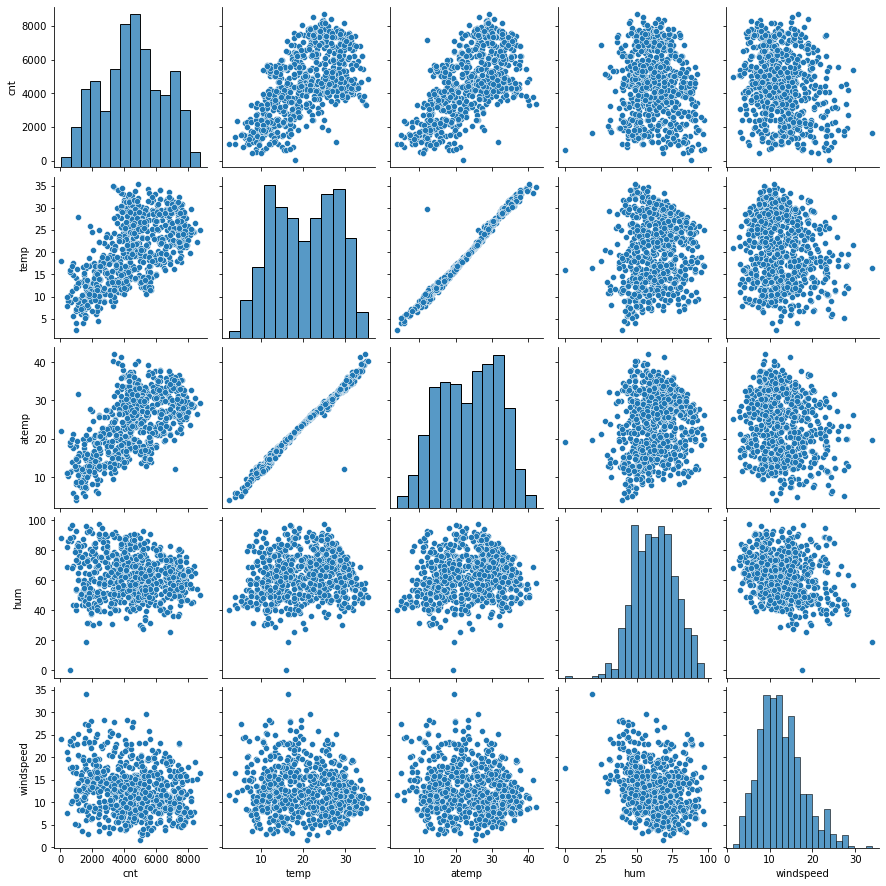

In [4613]:
#Check linear relationship between numeric variables
sns.pairplot(bike_df, vars=["cnt",'temp','atemp','hum','windspeed'])
plt.show()

Here we can see there is positive corelationship between cnt and temp atleast some of the variance in cnt are explained by 
the variable area.
for atemp and temp we can see same type of pattern multicollinerity. Also is there is linear relationship between cnt,temp and atemp.


In [4614]:
#checking correaltion between numeric variables
bike_df[['temp','atemp','hum','windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


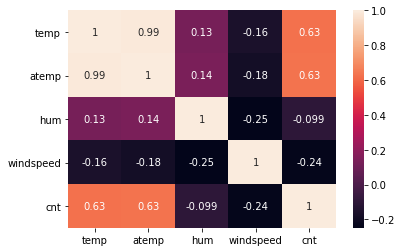

In [2831]:
# correaltion between continous varibales using heat map
sns.heatmap(bike_df[['temp','atemp','hum','windspeed','cnt']].corr(), annot=True)
plt.show()

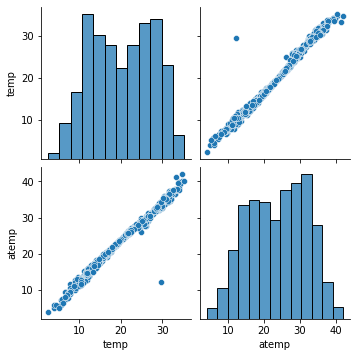

In [3841]:
sns.pairplot(bike_df[['temp','atemp']])
plt.show()

we can see there is a corelation between temp and atemp variables . 
value is 0.99 which is very high. We cannot use both the variables for analysis so dropping atemp

In [4615]:
#shape before drop
bike_df.shape

(730, 12)

In [4616]:
#Dropping atemp variable
bike_df.drop(['atemp'],axis=1,inplace=True)

In [4617]:
bike_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [4618]:
#shape after drop
bike_df.shape

(730, 11)

- Univariant analysis of categorical variables.

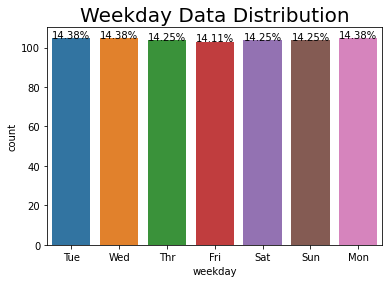

In [4619]:
ax = sns.countplot(x="weekday", data=bike_df)
for i in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * i.get_height()/len(bike_df)), ((i.get_x() + i.get_width()), (i.get_height())),ha='right')
plt.title('Weekday Data Distribution', fontsize=20)
plt.show()


     We can predict that company is operational at the same rate on all weekdays.

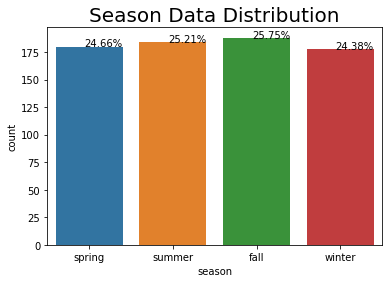

In [4620]:
ax = sns.countplot(x="season", data=bike_df)
for i in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * i.get_height()/len(bike_df)), ((i.get_x() + i.get_width()), (i.get_height())),ha='right')
plt.title('Season Data Distribution', fontsize=20)
plt.show()

     we can see that bike company is functioning on the same day all four seasons.

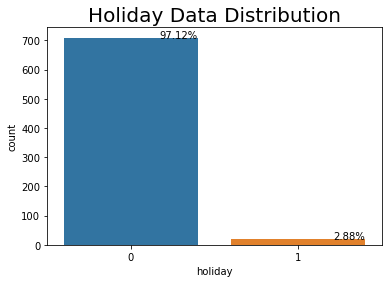

In [4621]:
ax = sns.countplot(x="holiday", data=bike_df)
for i in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * i.get_height()/len(bike_df)), ((i.get_x() + i.get_width()), (i.get_height())),ha='right')
plt.title('Holiday Data Distribution', fontsize=20)
plt.show()

   during holiday shared bike company is functional only on 3 % of days

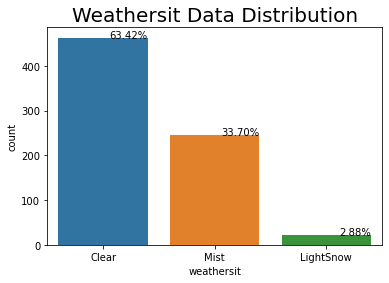

In [4622]:

ax = sns.countplot(x="weathersit", data=bike_df)
for i in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * i.get_height()/len(bike_df)), ((i.get_x() + i.get_width()), (i.get_height())),ha='right')
plt.title('Weathersit Data Distribution', fontsize=20)
plt.show()

     we can see company is operational in  Mist,Clear,Lightsnow weathersit. % of operation is high in clear.
    

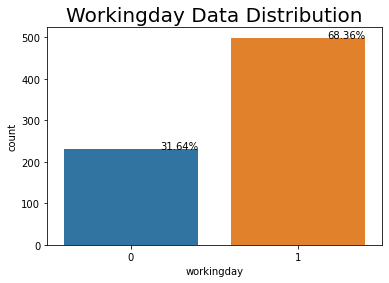

In [4623]:
ax = sns.countplot(x="workingday", data=bike_df)
for i in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * i.get_height()/len(bike_df)), ((i.get_x() + i.get_width()), (i.get_height())),ha='right')
plt.title('Workingday Data Distribution', fontsize=20)
plt.show()

         bussiness is almost half in non workingday as compared to workingdays.

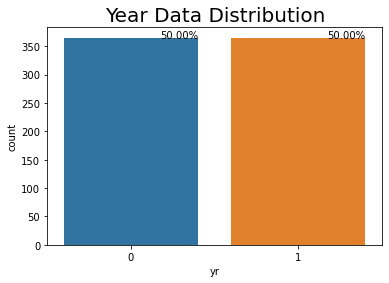

In [4624]:
ax = sns.countplot(x="yr", data=bike_df)
for i in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * i.get_height()/len(bike_df)), ((i.get_x() + i.get_width()), (i.get_height())),ha='right')
plt.title('Year Data Distribution', fontsize=20)
plt.show()

      bussiness is operational similar in both the year.

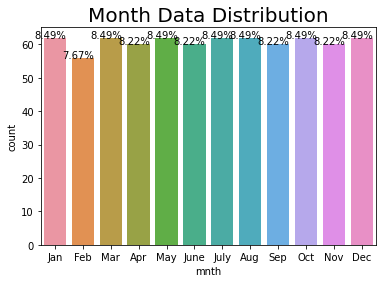

In [4625]:
ax = sns.countplot(x="mnth", data=bike_df)
for i in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * i.get_height()/len(bike_df)), ((i.get_x() + i.get_width()), (i.get_height())),ha='right')
plt.title('Month Data Distribution', fontsize=20)
plt.show()

        no of days operational is slightly high in month of Jan,Mar,May,Jul,Aug,Oct,Dec

###### bivarient analysis

  
   - Categorial Var

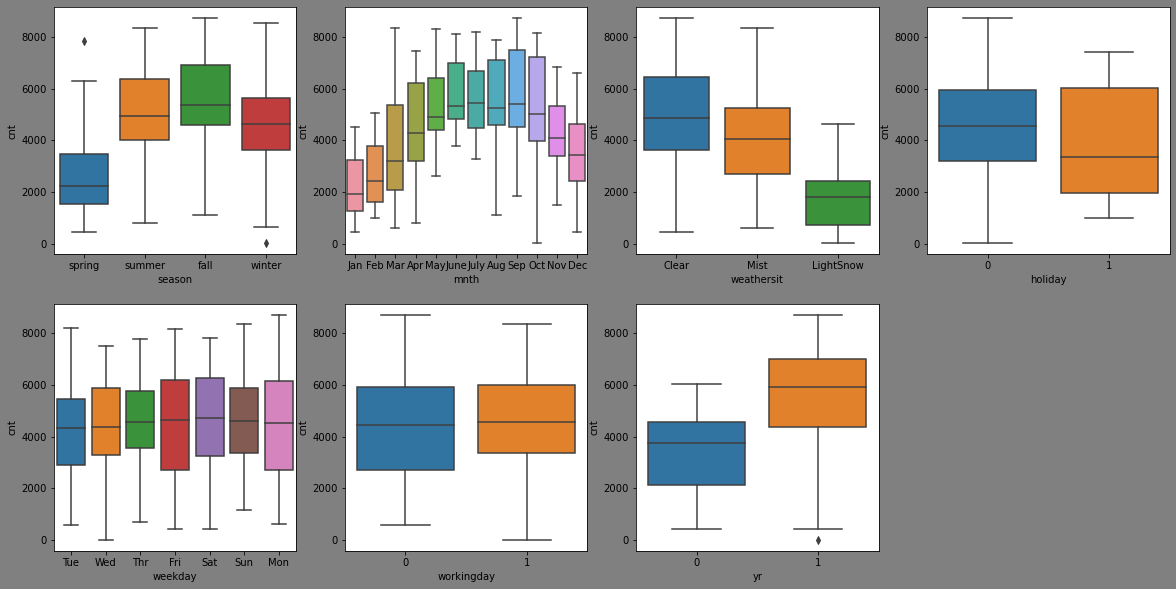

In [4626]:
#visualising categorial  variables using boxplot
#plt.figure(figsize=(29, 8))
plt.figure(figsize=(20,10),facecolor='gray')
plt.title('Distribution of categorical features')
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt',data = bike_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)

plt.show()



In [4627]:
def barPlot_cat_var(col):
    plt.figure(figsize = (8,4))
    sns.barplot(col,'cnt',data=bike_df, hue='yr')

    plt.show()

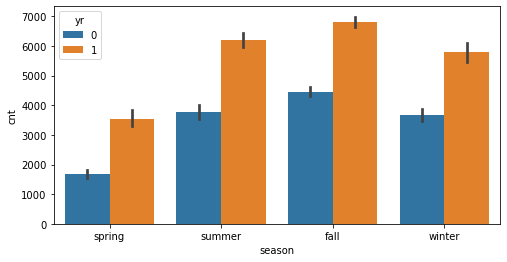

In [4628]:
# plotting visualization for season column

barPlot_cat_var('season')


In [4635]:

    bike_df.groupby('season')['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike_df.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike_df.cnt.count()*100
    cat_df


,sum,mean,count,sum_perc,count_perc
season,,,,,
fall,1061129,5644.303191,188,32.244879,25.753425
summer,918589,4992.331522,184,27.913469,25.205479
winter,841613,4728.162921,178,25.574374,24.383562
spring,469514,2608.411111,180,14.267278,24.657534


Demand/booking of shared bike is high in season fall. Summer season is following Season fall with cnt greater the 6000. Demand is low in spring.

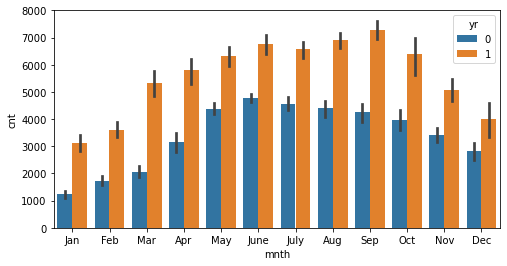

In [4636]:
barPlot_cat_var('mnth')

Demand of bike is high in month of sep,aug ,july june. We can say booking is high in Summer and fall. 

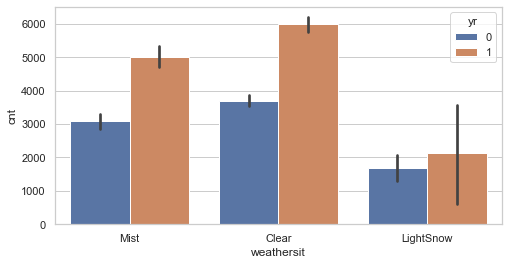

In [1083]:
barPlot_cat_var('weathersit')

booking is low when weather is lightsnow and in clear weather demand is high.

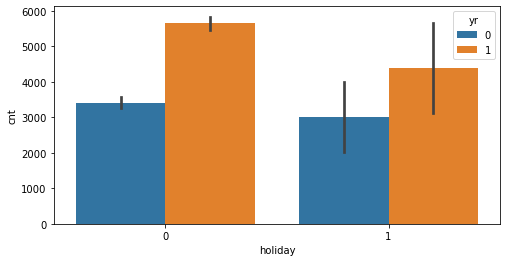

In [4637]:
barPlot_cat_var('holiday')

   booking of shared bike is less in holidays. Also demand on holiday is less in 2019 in comparision to 2018

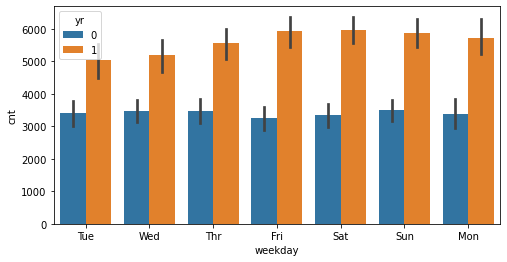

In [4638]:
barPlot_cat_var('weekday')

        Booking is little high on Thu and fri otherwise almost same throughout the weekdays

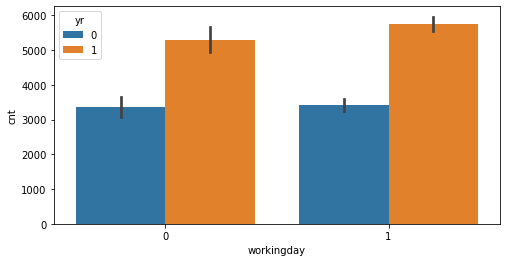

In [4639]:
barPlot_cat_var('workingday')

     As we can see bike demand is slightly high in workign day as compared to non working day. No significant change we can say.

<AxesSubplot:xlabel='yr', ylabel='cnt'>

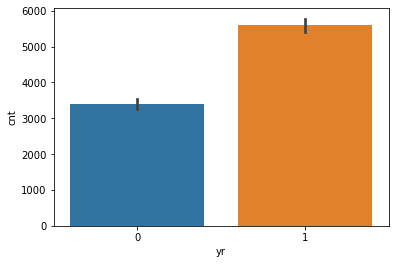

In [4640]:
  sns.barplot('yr','cnt',data=bike_df)

        Demand for shared bike is increased in year 2019.

- Numeric Variable

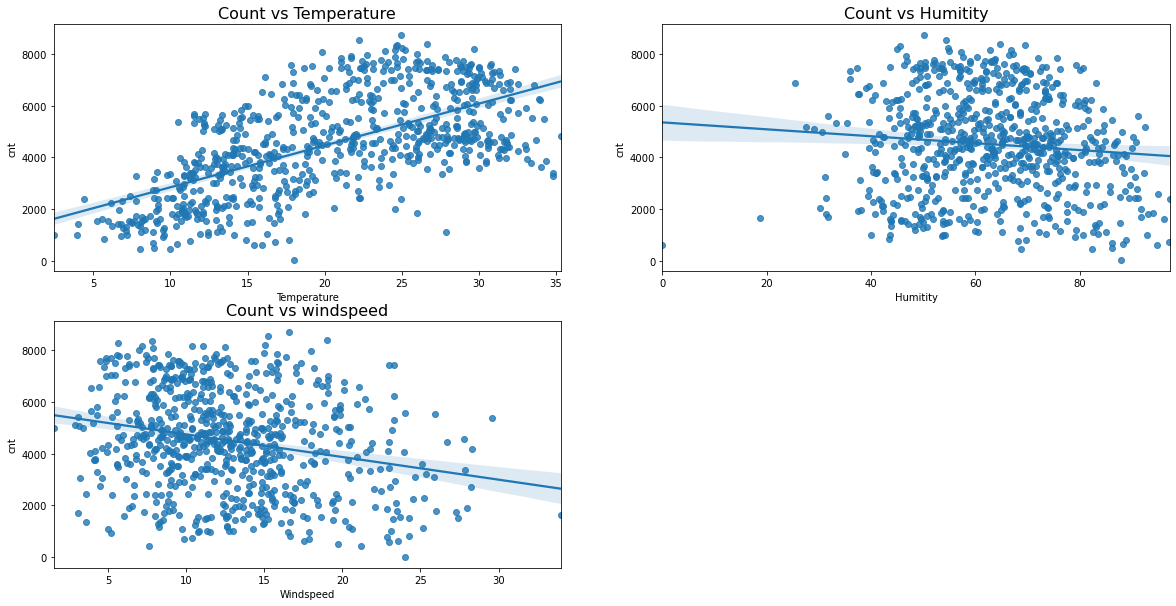

In [4641]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("Count vs Temperature",fontsize=16)
sns.regplot(data=bike_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.subplot(2,2,2)
plt.title("Count vs Humitity",fontsize=16)
sns.regplot(data=bike_df,y="cnt",x="hum")
plt.xlabel("Humitity")
plt.subplot(2,2,3)
plt.title("Count vs windspeed",fontsize=16)
sns.regplot(data=bike_df,y="cnt",x="windspeed")
plt.xlabel("Windspeed")

plt.show()

Cnt is positively correlated to temp. cnt increase as temp increase so linear relation between both the variables
Graph for Hum and Windspeed is scattered around the line and cnt is decreasing as hum decreases and same with Windspeed.

#### Corelation check using headmap

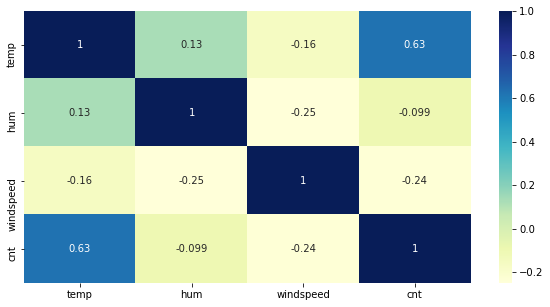

In [4643]:
plt.figure(figsize = (10,5))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Correlation of workingday with target is low so not considering for dummy.
temp is having high corelation with target.
hum is negativly corelated with target.

### Data Preparation

- Creating Dummy Variables

In [4644]:
#Creating dummy variables
list_cat = bike_df[['season','mnth','weathersit','weekday']]
#list_cat = bike_df[['season','mnth','weekday','weathersit']]
list_dummy = pd.get_dummies(list_cat,drop_first=True)

Now we have 3 columns to identify season having 4 levels 
- 000 will correspond to Season1
- 100 will correspond to Season2
- 010 will correspond to Season3
- 001 will correspond to Season4

Similarly for others variables also.

In [4645]:
bike_df[['yr','holiday','workingday']]= bike_df[['yr','holiday','workingday']].astype('uint8')


In [4646]:
list_dummy.shape

(730, 22)

In [4519]:
list_dummy.head()

,season_summer,season_fall,season_winter,mnth_Feb,mnth_Mar,mnth_Apr,mnth_May,mnth_June,mnth_July,mnth_Aug,...,mnth_Nov,mnth_Dec,weathersit_Mist,weathersit_LightSnow,weekday_Wed,weekday_Thr,weekday_Fri,weekday_Sat,weekday_Sun,weekday_Mon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [4647]:
#concat the dummy df to orignal df
bike_df = pd.concat([bike_df,list_dummy], axis = 1)

In [4648]:
#shape before drop
bike_df.shape

(730, 33)

In [4649]:
# as we have added dummies so orignal variable would be irrelevent so droping 
bike_df.drop(['season','mnth','weathersit'], axis=1, inplace=True)

In [4650]:
bike_df.drop(['weekday'], axis=1, inplace=True)

In [4652]:
#checkeg shape after drop
bike_df.shape

(730, 29)

In [3429]:
#bike_df[['yr','holiday','workingday']]= bike_df[['yr','holiday','workingday']].astype('uint8')
#bike_df.info()

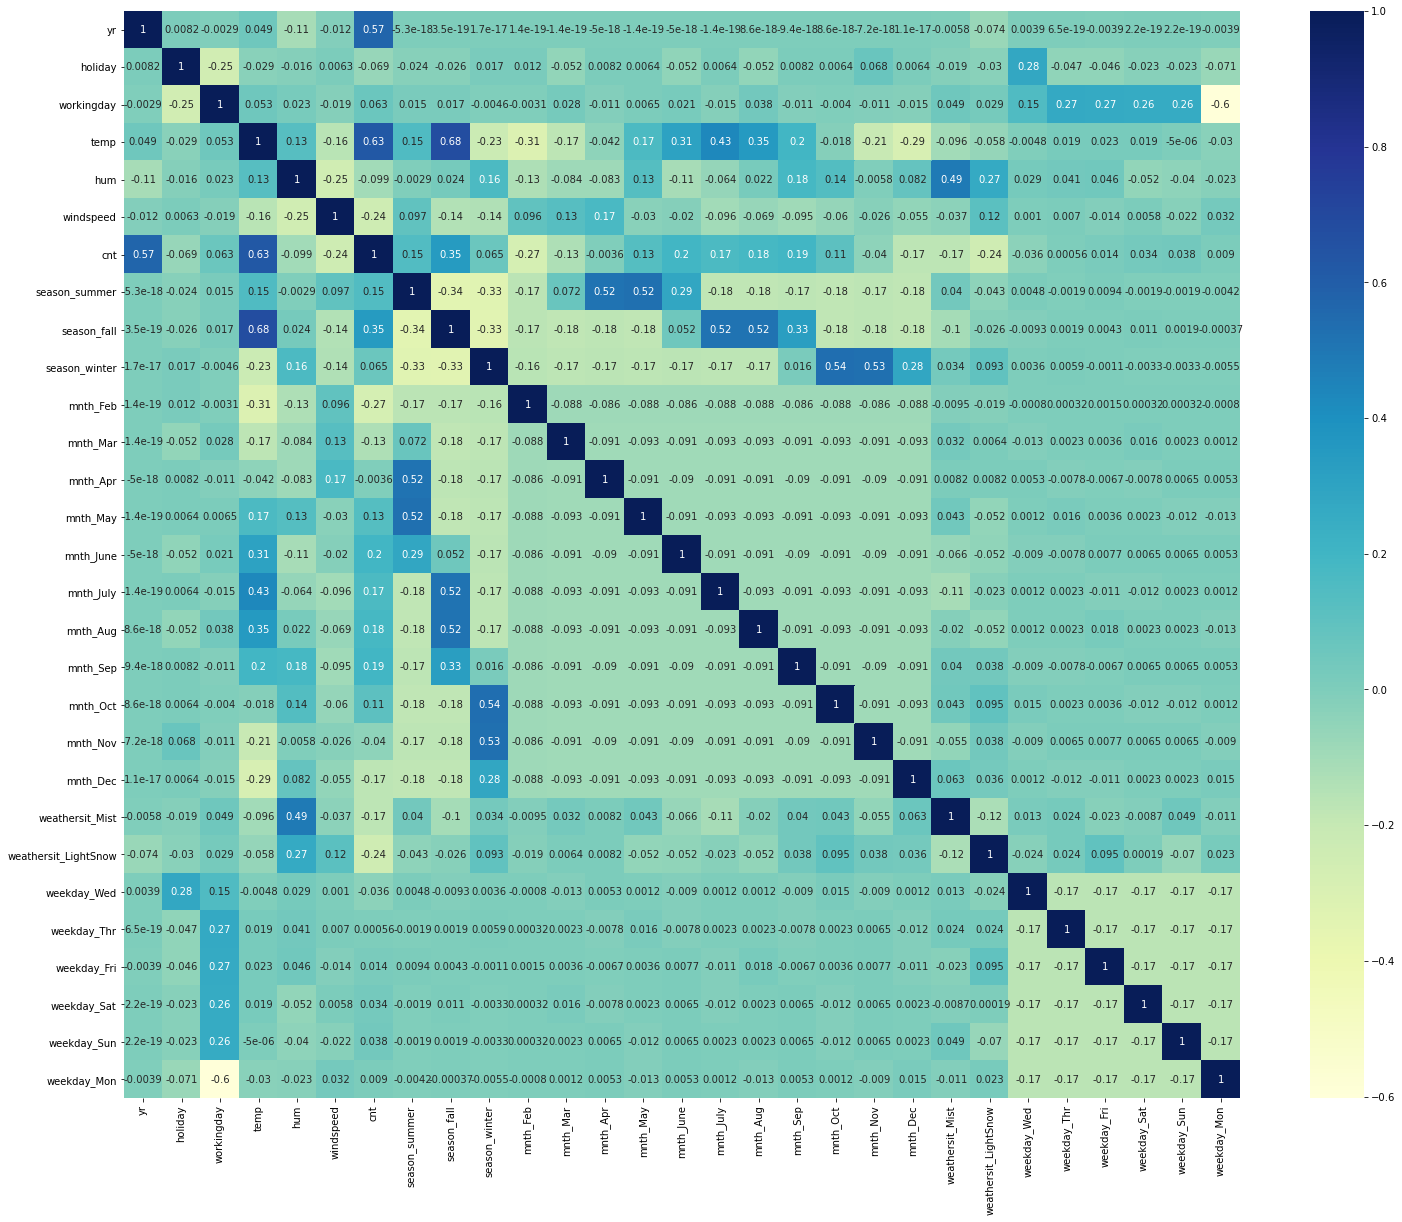

In [4653]:
# Let's check the correlation coefficients to see which variables are highly correlated. 


plt.figure(figsize = (25,20))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

we can clearly see predictor variable temp is highly corelated with target variable with 0.65 .
Also few variables are multicollinear and some variables have high collinearity with the target variable. 
like mnth_nov and mnth_oct  with season_winter 0.54 and 0.53.
Seasom_summer and month_may and so on.

##### Splitting the Data into Train and Test Sets

In [4654]:
bikesharing=bike_df


In [4655]:
bikesharing.shape

(730, 29)

In [4656]:
#Split dataset in train and test
np.random.seed(0)
train_data,test_data=train_test_split(bike_df ,train_size=0.7,random_state =10)
print(train_data.shape)
print(test_data.shape)

(510, 29)
(220, 29)


##### Feature ReScaling 

Variables in dataset are in different scale so need to rescale them on comparable scale. As there is not significant outliers so we can use Normalixation method to scale the variables.

In [4657]:
scaler = MinMaxScaler()

# Create list of numeric variable
list_num = ['temp', 'hum', 'windspeed','cnt']

# 2. Fit the object

#what we are doing take the dataframe of numeric variables learn respective min and max values and trasform all the columns
train_data[list_num]=scaler.fit_transform(train_data[list_num])
train_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_Nov,mnth_Dec,weathersit_Mist,weathersit_LightSnow,weekday_Wed,weekday_Thr,weekday_Fri,weekday_Sat,weekday_Sun,weekday_Mon
72,0,0,1,0.298094,0.393891,0.236118,0.194978,0,0,0,...,0,0,0,0,1,0,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,0.737052,1,0,0,...,0,0,0,0,0,0,0,0,0,1
700,1,0,0,0.327249,0.809877,0.210252,0.509236,0,0,1,...,0,1,1,0,0,0,0,0,0,0
264,0,0,1,0.694699,0.910249,0.217975,0.526862,0,1,0,...,0,0,1,0,0,0,0,1,0,0
577,1,0,1,0.811368,0.624004,0.244886,0.863093,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [4658]:
train_data[list_num].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.513354,0.563841,0.342904,0.492000
std,0.233194,0.183851,0.162760,0.236196
min,0.000000,0.000000,0.000000,0.000000
25%,0.314983,0.426048,0.225964,0.325456
50%,0.506613,0.562400,0.322431,0.490945
75%,0.721686,0.697621,0.434281,0.675812
max,1.000000,1.000000,1.000000,1.000000


We have used MinMax Scaling ,we can see min and max of all variables lie between 0-1

##### Spliting test data into y_train and X_train

In [4659]:
#Dividing into X and Y sets for the model building
y_train = train_data.pop('cnt')
X_train = train_data

In [4660]:
# Checking shape and size for train and test
print(X_train.shape)

print(y_train.shape)


(510, 28)
(510,)


#### Building a Linear Model

In [ ]:
#For model building i start with top down approch. I selated all the features at once and create the modle

In [4672]:
X_train_top=X_train

In [4673]:
X_train_lm_top = sm.add_constant(X_train_top)
# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm_top).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     102.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          7.03e-181
Time:                        11:16:27   Log-Likelihood:                 500.04
No. Observations:                 510   AIC:                            -944.1
Df Residuals:                     482   BIC:                            -825.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1529 

Here we can see pvalue for most of the features are high.R^2 is significant but we cant say this is good model.
So i will use RFE method with 15 features and check.

 #### RFE

In [4661]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

Selected top 15 Variables for model bulding.

In [4662]:
rfe = RFE(lrm, 15)
rfe = rfe.fit(X_train, y_train)

In [4663]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [4664]:
#checking which all var selected for modeling by RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_Feb', False, 6),
 ('mnth_Mar', True, 1),
 ('mnth_Apr', False, 2),
 ('mnth_May', True, 1),
 ('mnth_June', False, 3),
 ('mnth_July', False, 8),
 ('mnth_Aug', True, 1),
 ('mnth_Sep', True, 1),
 ('mnth_Oct', True, 1),
 ('mnth_Nov', False, 9),
 ('mnth_Dec', False, 11),
 ('weathersit_Mist', True, 1),
 ('weathersit_LightSnow', True, 1),
 ('weekday_Wed', False, 7),
 ('weekday_Thr', False, 10),
 ('weekday_Fri', False, 13),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 12),
 ('weekday_Mon', False, 4)]

In [4674]:
#storing all 15 variables which is selected by RFE 
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_Mar', 'mnth_May', 'mnth_Aug',
       'mnth_Sep', 'mnth_Oct', 'weathersit_Mist', 'weathersit_LightSnow'],
      dtype='object')


In [4675]:
#Variables which are excluded by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Feb', 'mnth_Apr', 'mnth_June', 'mnth_July',
       'mnth_Nov', 'mnth_Dec', 'weekday_Wed', 'weekday_Thr', 'weekday_Fri',
       'weekday_Sat', 'weekday_Sun', 'weekday_Mon'],
      dtype='object')

In [4676]:
#storing final 15 columns to another var
X_train_rfe = X_train[col]

In [4677]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_Mar,mnth_May,mnth_Aug,mnth_Sep,mnth_Oct,weathersit_Mist,weathersit_LightSnow
72,0,0,0.298094,0.393891,0.236118,0,0,0,1,0,0,0,0,0,0
510,1,0,0.778657,0.694105,0.364071,1,0,0,0,1,0,0,0,0,0
700,1,0,0.327249,0.809877,0.210252,0,0,1,0,0,0,0,0,1,0
264,0,0,0.694699,0.910249,0.217975,0,1,0,0,0,0,1,0,1,0
577,1,0,0.811368,0.624004,0.244886,0,1,0,0,0,1,0,0,0,0


In [4669]:
X_train_rfe.shape

(510, 15)

In [4670]:
#Metod to claculate VIF which is useful to identify corellation between variables
def Fun_VIFcalculation(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [4671]:
Fun_VIFcalculation(X_train_rfe)

,Features,VIF
2,temp,19.47
3,hum,12.27
6,season_fall,7.26
4,windspeed,3.82
5,season_summer,3.80
7,season_winter,3.05
13,weathersit_Mist,2.35
0,yr,1.99
10,mnth_Aug,1.72
9,mnth_May,1.64


###### Building model using STAT module- OLS(Ordinary least-squares)

##### - First Model

In [4678]:
#Building 1st linear regression using RFE
#adding constant to rfe indentified train set, fit the model and check the summary
X_train_lrm1 = sm.add_constant(X_train_rfe)
lrm1 = sm.OLS(y_train,X_train_lrm1).fit()
print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.39e-189
Time:                        11:19:54   Log-Likelihood:                 489.38
No. Observations:                 510   AIC:                            -946.8
Df Residuals:                     494   BIC:                            -879.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1956 

p-value for variable mnth_May is >0.05 so need to remove it from model. 

Here we can see there is no significant drop in R^2 and P value of features are not quite high. So i will continue with this approch.

Checking how Model behave when we take 10 varables in RFE

In [4679]:
#Model creation with 10 variables
rfe1 = RFE(lrm, 10)
rfe1 = rfe1.fit(X_train, y_train)

In [4680]:
col1 = X_train.columns[rfe1.support_]
print(col1)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_Sep', 'weathersit_LightSnow'],
      dtype='object')


In [4681]:
#storing final 15 columns to another var
X_train_rfe1 = X_train[col1]

In [4684]:
X_train_lm1 = sm.add_constant(X_train_rfe1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          8.30e-185
Time:                        11:26:32   Log-Likelihood:                 464.62
No. Observations:                 510   AIC:                            -907.2
Df Residuals:                     499   BIC:                            -860.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2206 

If we see there is no significant drop in R^2.Pvalue is also good with in acceptable range .

So either way work,I will continue with one by one feature elemination to get more idea how Model behaving when i drop features one by one.

In [4685]:
 Fun_VIFcalculation(X_train_rfe1)          

,Features,VIF
2,temp,16.98
3,hum,7.74
6,season_fall,5.99
4,windspeed,3.65
5,season_summer,3.42
7,season_winter,2.57
0,yr,1.97
8,mnth_Sep,1.34
9,weathersit_LightSnow,1.18
1,holiday,1.04



 In first model with 15 features mnth_May>0.05 so dropping it

In [4686]:
# rmemoving variable mnth_May as P value is high.
X_train_new = X_train_rfe.drop(['mnth_May'], axis = 1)
#X_train_new = X_train_rfe.drop(['holiday'], axis = 1)

In [4687]:
#checking shape after drop
X_train_new.shape

(510, 14)

#### - Second Model

In [4688]:
# Building 2nd linear regression model after droping holiday

X_train_lrm2 = sm.add_constant(X_train_new)
lrm2 = sm.OLS(y_train,X_train_lrm2).fit()
print(lrm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.1
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.07e-189
Time:                        11:58:29   Log-Likelihood:                 487.46
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     495   BIC:                            -881.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1908 

In [4411]:
Fun_VIFcalculation(X_train_new)

,Features,VIF
2,temp,19.22
3,hum,12.11
6,season_fall,7.12
4,windspeed,3.76
5,season_summer,3.54
7,season_winter,3.00
12,weathersit_Mist,2.34
0,yr,1.98
9,mnth_Aug,1.72
11,mnth_Oct,1.59


pvalue for variables mnth_Aug > 0.05. so dropping the feature and build new model

In [4689]:
# We can drop mnth_Aug variable as it has high VIF

#X_train_new = X_train_new.drop(['hum'], axis = 1)
X_train_new = X_train_new.drop(['mnth_Aug'], axis = 1)
X_train_new.shape

(510, 13)

#### - Third Model

In [4690]:
# Building 3rd linear regression model

X_train_lrm3 = sm.add_constant(X_train_new)
lrm3 = sm.OLS(y_train,X_train_lrm3).fit()
print(lrm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          4.51e-190
Time:                        11:59:58   Log-Likelihood:                 485.58
No. Observations:                 510   AIC:                            -943.2
Df Residuals:                     496   BIC:                            -883.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1870 

In [4691]:
Fun_VIFcalculation(X_train_new)

,Features,VIF
2,temp,19.22
3,hum,12.09
6,season_fall,6.28
4,windspeed,3.76
5,season_summer,3.54
7,season_winter,2.99
11,weathersit_Mist,2.34
0,yr,1.98
10,mnth_Oct,1.59
12,weathersit_LightSnow,1.37


P value for all the variables are within a range so checking VIF.VIF is high for variable hum ,so removing from model

In [4692]:
# We can drop nov variable as it has high VIF

X_train_new = X_train_new.drop(['hum'], axis = 1)
#X_train_new = X_train_new.drop(['workingday'], axis = 1)
X_train_new.shape

(510, 12)

#### - Fourth Model

In [4693]:
X_train_lrm4 = sm.add_constant(X_train_new)
lrm4 = sm.OLS(y_train,X_train_lrm4).fit()
print(lrm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.3
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.17e-186
Time:                        12:01:10   Log-Likelihood:                 474.04
No. Observations:                 510   AIC:                            -922.1
Df Residuals:                     497   BIC:                            -867.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1065 

In [4694]:
Fun_VIFcalculation(X_train_new)

,Features,VIF
2,temp,13.50
5,season_fall,6.08
3,windspeed,3.56
4,season_summer,3.52
6,season_winter,2.87
0,yr,1.98
9,mnth_Oct,1.57
10,weathersit_Mist,1.53
8,mnth_Sep,1.35
7,mnth_Mar,1.18


In [ ]:
After 4th model VIF is high for season_fall,so dropping it

In [4695]:
# We can drop season_fall variable as it has high VIF
X_train_new = X_train_new.drop(['season_fall'], axis = 1)
#X_train_new = X_train_new.drop(['hum'], axis = 1)
X_train_new.shape

(510, 11)

In [4696]:
X_train_lrm5 = sm.add_constant(X_train_new)
lrm5 = sm.OLS(y_train,X_train_lrm5).fit()
print(lrm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.0
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.89e-182
Time:                        12:01:58   Log-Likelihood:                 460.73
No. Observations:                 510   AIC:                            -897.5
Df Residuals:                     498   BIC:                            -846.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0943 

#### - Fifth Model

In [4697]:
Fun_VIFcalculation(X_train_new)

,Features,VIF
2,temp,3.85
3,windspeed,3.46
0,yr,1.97
5,season_winter,1.91
4,season_summer,1.64
8,mnth_Oct,1.54
9,weathersit_Mist,1.53
7,mnth_Sep,1.30
6,mnth_Mar,1.16
10,weathersit_LightSnow,1.11


p value not 0 for mnth_Mar so need to remove from model

In [4698]:
# We can drop mnth_Mar variable as it has high VIF
#X_train_new = X_train_new.drop(['windspeed'], axis = 1)
X_train_new = X_train_new.drop(['mnth_Mar'], axis = 1)
X_train_new.shape

(510, 10)

#### - Sixth Model

In [4699]:
X_train_lrm6 = sm.add_constant(X_train_new)
lrm6 = sm.OLS(y_train,X_train_lrm6).fit()
print(lrm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          5.83e-182
Time:                        12:02:42   Log-Likelihood:                 457.90
No. Observations:                 510   AIC:                            -893.8
Df Residuals:                     499   BIC:                            -847.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1029 

In [4700]:
Fun_VIFcalculation(X_train_new)

,Features,VIF
2,temp,3.82
3,windspeed,3.30
0,yr,1.96
5,season_winter,1.88
4,season_summer,1.63
7,mnth_Oct,1.54
8,weathersit_Mist,1.51
6,mnth_Sep,1.30
9,weathersit_LightSnow,1.11
1,holiday,1.04


In [ ]:
P value of mnt_oct is not zero so removing the variable

In [4701]:
X_train_new = X_train_new.drop(['mnth_Oct'], axis = 1)
X_train_new.shape

(510, 9)

In [4702]:
X_train_lrm7 = sm.add_constant(X_train_new)
lrm7 = sm.OLS(y_train,X_train_lrm7).fit()
print(lrm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     256.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.57e-181
Time:                        12:03:23   Log-Likelihood:                 453.17
No. Observations:                 510   AIC:                            -886.3
Df Residuals:                     500   BIC:                            -844.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0969 

In [4703]:
Fun_VIFcalculation(X_train_new)

,Features,VIF
2,temp,3.75
3,windspeed,3.28
0,yr,1.96
4,season_summer,1.63
7,weathersit_Mist,1.51
5,season_winter,1.44
6,mnth_Sep,1.26
8,weathersit_LightSnow,1.11
1,holiday,1.04


In [ ]:
now vif values for variables are with in a range and also pvalue is 0. 

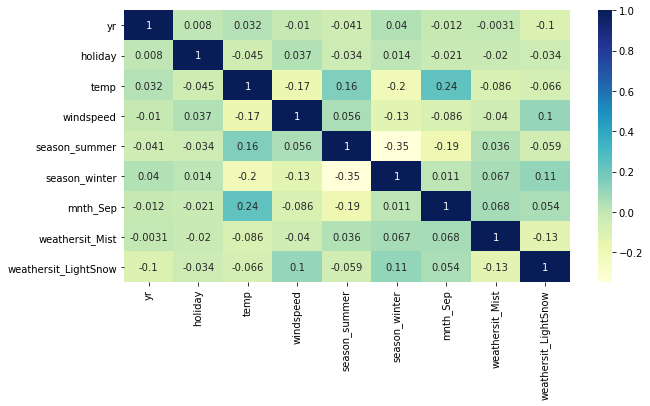

In [4705]:
plt.figure(figsize = (10,5))
sns.heatmap(X_train_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

Trying to drop 1 or 2 more feature which will not impact model significantly. Holiday is having low correlation so we can drop

In [4709]:
X_train_new = X_train_new.drop(['holiday'], axis = 1)
X_train_new.shape

(510, 8)

In [4710]:
X_train_lrm7 = sm.add_constant(X_train_new)
lrm7 = sm.OLS(y_train,X_train_lrm7).fit()
print(lrm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.1
Date:                Tue, 10 May 2022   Prob (F-statistic):          3.69e-179
Time:                        12:12:47   Log-Likelihood:                 445.51
No. Observations:                 510   AIC:                            -873.0
Df Residuals:                     501   BIC:                            -834.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0929 

Now we are in good postion model is looking good with significant with all the measures.

##### Hypothesis Testing:



H0:B1=B2=...=Bn=0 

H1:at least one  Bi!=0

In [4559]:
lrm7.params

const                   0.092903
yr                      0.255873
temp                    0.554177
windspeed              -0.138706
season_summer           0.093584
season_winter           0.142415
mnth_Sep                0.093977
weathersit_Mist        -0.083898
weathersit_LightSnow   -0.259757
dtype: float64

Here we can say we reject the null hypothesis bec coefficients of all the variable in final model is not zero. 

After Model building and Hypothesis testisting below are the observations:
- Model 7- lrm7 looks good.
- VIF of remainig variables are below 5 that means there is no Multicollinearity between the predictor variables
- pvalue is <0.05. A low pvalue indicates we can reject null hypothesis.Low p value is likely to be meaningful addition to the  model.And fit is not by chance.
- Also $R^2$= 0.817. if $R^2$ is high data points tends to fall closer to the fitted line.



#### Confirming Linear Regression Assumptions:

#####  Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [4711]:
X_train_lrm7.head()

,const,yr,temp,windspeed,season_summer,season_winter,mnth_Sep,weathersit_Mist,weathersit_LightSnow
72,1.0,0,0.298094,0.236118,0,0,0,0,0
510,1.0,1,0.778657,0.364071,1,0,0,0,0
700,1.0,1,0.327249,0.210252,0,1,0,1,0
264,1.0,0,0.694699,0.217975,0,0,1,1,0
577,1.0,1,0.811368,0.244886,0,0,0,0,0


##### - Error terms are normally distributed with mean zero (not X, Y)

In [4712]:
#calculate y_train_pred
y_train_pred = lrm7.predict(X_train_lrm7)

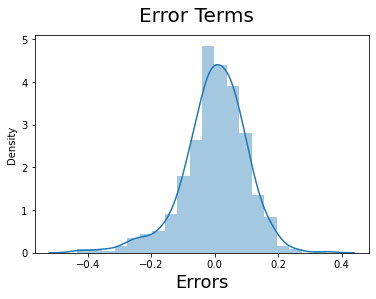

In [4713]:
# Plot the histogram of the error terms
residual =y_train - y_train_pred
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18) 
plt.show()

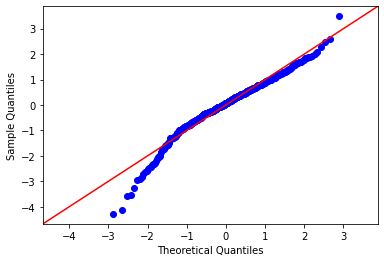

In [4714]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

Error terms are following normal distribution

##### - Homoscedasticity check

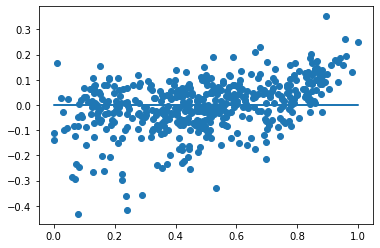

In [4717]:
plt.scatter(y_train, residual)
plt.plot(y_train, [0]*len(y_train))

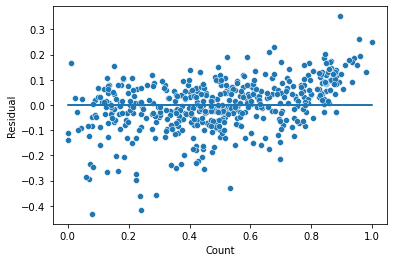

In [4716]:
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train))

plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Error term satisfies a fairly constant/equal variance and there is no visible pattern observed above for the residuals.


##### - Multicollinearity check between the predictor variables

In [4720]:
Fun_VIFcalculation(X_train_new)

,Features,VIF
1,temp,3.75
2,windspeed,3.25
0,yr,1.96
3,season_summer,1.63
6,weathersit_Mist,1.51
4,season_winter,1.44
5,mnth_Sep,1.26
7,weathersit_LightSnow,1.10


##### -Linearity check

<Figure size 288x288 with 0 Axes>

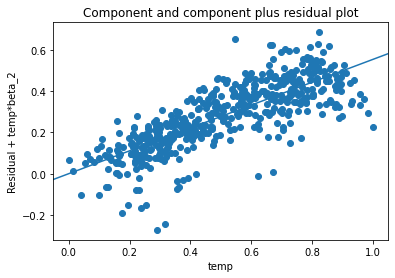

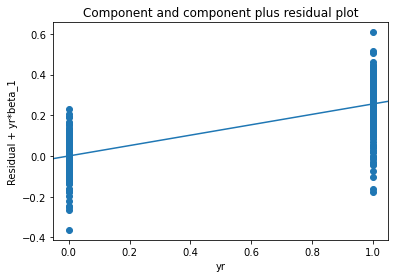

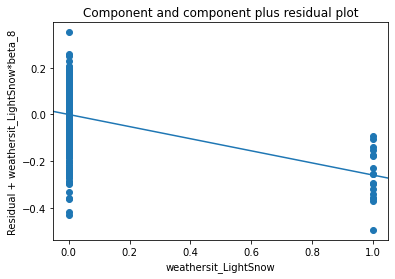

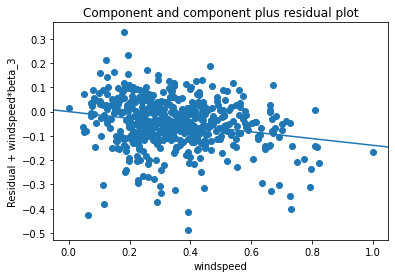

In [4719]:
fig = plt.figure(figsize=(4, 4))
sm.graphics.plot_ccpr(lrm7, 'temp')
sm.graphics.plot_ccpr(lrm7, 'yr')
sm.graphics.plot_ccpr(lrm7, 'weathersit_LightSnow')
sm.graphics.plot_ccpr(lrm7, 'windspeed')
plt.show()



#### - Error terms are independent of each other

In [4577]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(lrm6.resid)

2.0751156133768984

The value is between 1.5 to 2.5. We can say Error terms are independent.

### Making Predictions

In [4578]:
list_num

['temp', 'hum', 'windspeed', 'cnt']

In [4579]:
#transform test set
test_data[list_num] = scaler.transform(test_data[list_num] )


In [4580]:
test_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_Nov,mnth_Dec,weathersit_Mist,weathersit_LightSnow,weekday_Wed,weekday_Thr,weekday_Fri,weekday_Sat,weekday_Sun,weekday_Mon
566,1,0,0,0.652175,0.863516,0.393568,0.486297,0,1,0,...,0,0,0,1,0,0,0,0,0,1
374,1,0,1,0.276477,0.584521,0.340487,0.382349,0,0,0,...,0,0,0,0,0,1,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0.595316,0,1,0,...,0,0,0,0,0,0,0,0,1,0
529,1,0,1,0.720868,0.486457,0.476922,0.836895,1,0,0,...,0,0,0,0,0,0,0,1,0,0
233,0,0,1,0.777567,0.359532,0.524373,0.522395,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [4581]:
test_data[list_num] .describe()

,temp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000
mean,0.538780,0.552654,0.355062,0.492709
std,0.253365,0.175978,0.152994,0.228453
min,-0.050062,-0.239512,0.041051,-0.049378
25%,0.311711,0.420738,0.249687,0.338253
50%,0.559495,0.556027,0.335269,0.509960
75%,0.775931,0.679103,0.437533,0.653054
max,0.983645,0.969106,0.864144,0.933961


In [4582]:
# creating y_test and X_test for model prediction
y_test = test_data.pop('cnt')
X_test = test_data

In [4583]:
# adding Model variables 
X_test_nw = X_test[X_train_new.columns]

In [4584]:
# Adding a constant variable 
X_test_nw = sm.add_constant(X_test_nw)

In [4585]:
# Making predictions
y_pred_test = lrm7.predict(X_test_nw)

In [4586]:
finalvar_list=list(lrm6.params.index)
finalvar_list.remove('const')
print("Final Variables list \n", finalvar_list)

Final Variables list 
 ['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_Sep', 'mnth_Oct', 'weathersit_Mist', 'weathersit_LightSnow']


##### Model evaluation

In [4587]:
#calcualting r-squre for test data
r2_score_test=r2_score(y_true=y_test,y_pred=y_pred_test)
round(r2_score_test,3)

0.813

Calculating Adjusted R squared value   $R^2$  Adj. = (1-$R^2$)*(1-$n$)/($n$-$p$-1) Where n= total sample,p=indipendent variable

In [4588]:
r2_adj_test=round((1-((1-r2_score_test)*(len(X_test)-1)/(len(X_test)-len(finalvar_list)-1))),3)
r2_adj_test

0.804

In [4589]:
finalvar_list=list(lrm6.params.index)
finalvar_list.remove('const')
print("Final Variables list \n", finalvar_list)

Final Variables list 
 ['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_Sep', 'mnth_Oct', 'weathersit_Mist', 'weathersit_LightSnow']


In [4590]:
# Mean Sqare Error
meanSqu_Error = mean_squared_error(y_test, y_pred_test)
print('Mean_Squared_Error :' ,round(meanSqu_Error,4))

Mean_Squared_Error : 0.0097


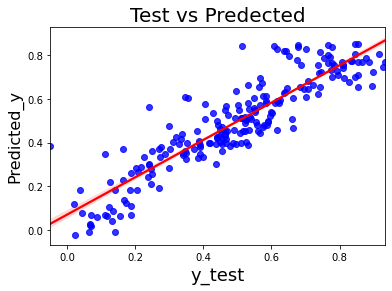

In [4591]:
plt.figure()
sns.regplot(y_test,y_pred_test,scatter_kws={"color": "blue"}, line_kws={"color": "red"}, ci=70)
plt.title('Test vs Predected', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('Predicted_y', fontsize=16)
plt.show()

DataPoint are very close to fit line 

In [4592]:
#checking r2 value using r2_score method
r2_train=round(r2_score(y_true=y_train,y_pred=y_train_pred),3)
r2_train


0.817

In [4593]:
print('R-Squared for TrainData Set is      ' ,round(r2_score(y_true=y_train,y_pred=y_train_pred),3))
print('ADJ R-Squared for TrainData Set is  ',round(lrm7.rsquared_adj,3))
print('R-Squared for TestData Set is       ',round(r2_score_test,3))
print('ADJ R-Squared for TestData Set is   ',r2_adj_test)
print('Mean_Squared_Error                  ' ,round(meanSqu_Error,4))


R-Squared for TrainData Set is       0.817
ADJ R-Squared for TrainData Set is   0.814
R-Squared for TestData Set is        0.813
ADJ R-Squared for TestData Set is    0.804
Mean_Squared_Error                   0.0097


In [4594]:
print ('Final Coefficients are \n'  ,round(lrm6.params,4))

Final Coefficients are 
 const                   0.1029
yr                      0.2548
holiday                -0.0953
temp                    0.5402
windspeed              -0.1356
season_summer           0.0941
season_winter           0.1236
mnth_Sep                0.1020
mnth_Oct                0.0581
weathersit_Mist        -0.0860
weathersit_LightSnow   -0.2700
dtype: float64


We can see that the equation of our best fitted line is:-

$cnt$ = 
0.1029 + (0.2548$*$yr$) + (-0.0953$*$holiday$) + (0.5402$*$temp$) + (-0.1356 $*$windspeed$) + (0.0941$*$season$_$summer$) + (0.0860$*$season$_$winter$) + (0.1020$*$mnth$_$Sep$)+ (0.0581$*$mnth$_$Oct$)
+(-0.2925$*$weathersit$_$Mist$) + (-0.2700$*$weathersit$_$LightSnow$)

Conclusion:-

Features which are effecting the bike demand is well explained by Coeffiencients.
R-Sqaured and adj R-Sqaured value for train and test is >80% which signify good demand of bike.
F-Stat=279.1 and prob(F-Stat)=3.69e-179 overall model is significant.

Demand of bikes depend on yr,temp, holiday , windspeed,season_summer,season_winter, mnt_oct, mnth_Sep, weekday_Sun and weathersit_LightSnow,weathersit_Mist